In [115]:
from importlib import reload
import utils_tf as u
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split
import IPython
import IPython.display
import matplotlib as mpl
import pandas as pd
import seaborn as sns

reload(u)

# This file is used to configure settings use for training

path = "./data/all_data.csv"
df = pd.read_csv(path)

df_cons = df[["y"]]
df_cons = df_cons.dropna()

# column_indices = {name: i for i, name in enumerate(df_cons.columns)}

n = len(df_cons)
train_df = df_cons[0 : int(n * 0.7)]
val_df = df_cons[int(n * 0.7) : int(n * 0.9)]
test_df = df_cons[int(n * 0.9) :]

num_features = 1

train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

In [116]:
single_lstm_model = keras.models.load_model("lstm_model_single_step.h5")
multi_lstm_model = keras.models.load_model("lstm_model_multi_step.h5")

In [117]:
multi_RNN_window = u.WindowGenerator(
    input_width=50, label_width=50, shift=50,
    label_columns=['y'])

In [118]:
val_performance = {}
performance = {}

val_performance['LSTM_single'] = single_lstm_model.evaluate(multi_RNN_window.val)
performance['LSTM_single'] = single_lstm_model.evaluate(multi_RNN_window.test, verbose=0)
val_performance['LSTM_multi'] = multi_lstm_model.evaluate(multi_RNN_window.val)
performance['LSTM_multi'] = multi_lstm_model.evaluate(multi_RNN_window.test, verbose=0)

545/545 [==============================] - 5s 8ms/step - loss: 0.0624 - root_mean_squared_error: 0.2498


In [119]:
val_performance

{'LSTM_single': [0.10531570762395859, 0.32452383637428284],
 'LSTM_multi': [0.06239587068557739, 0.24979166686534882]}

In [120]:
performance

{'LSTM_single': [0.0872599333524704, 0.2953978478908539],
 'LSTM_multi': [0.04497252404689789, 0.21206723153591156]}

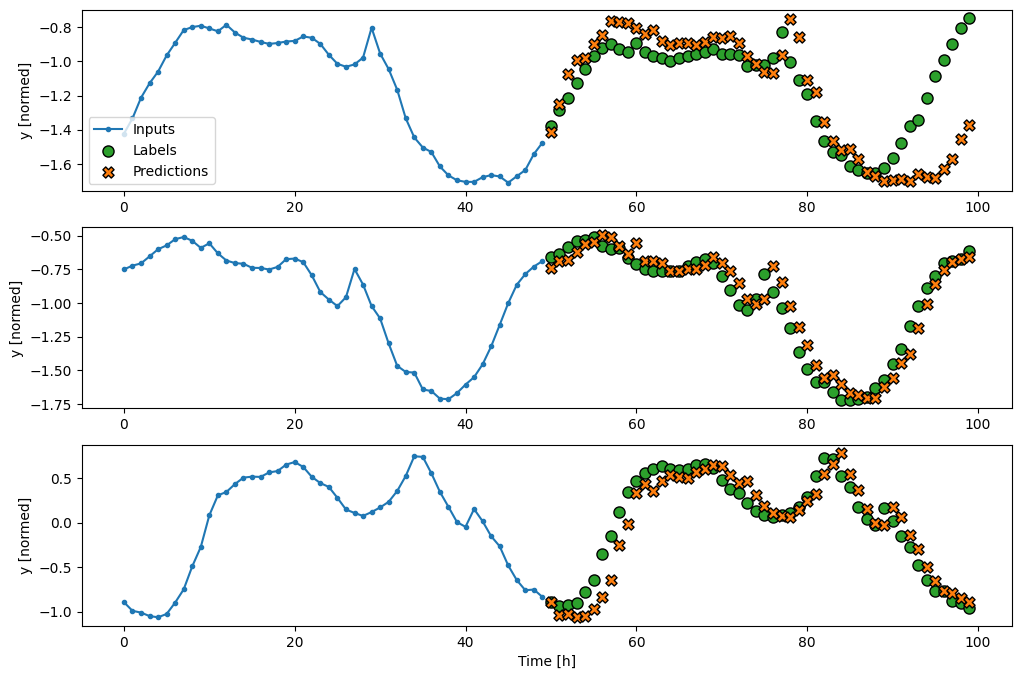

In [121]:
multi_RNN_window.plot(single_lstm_model)

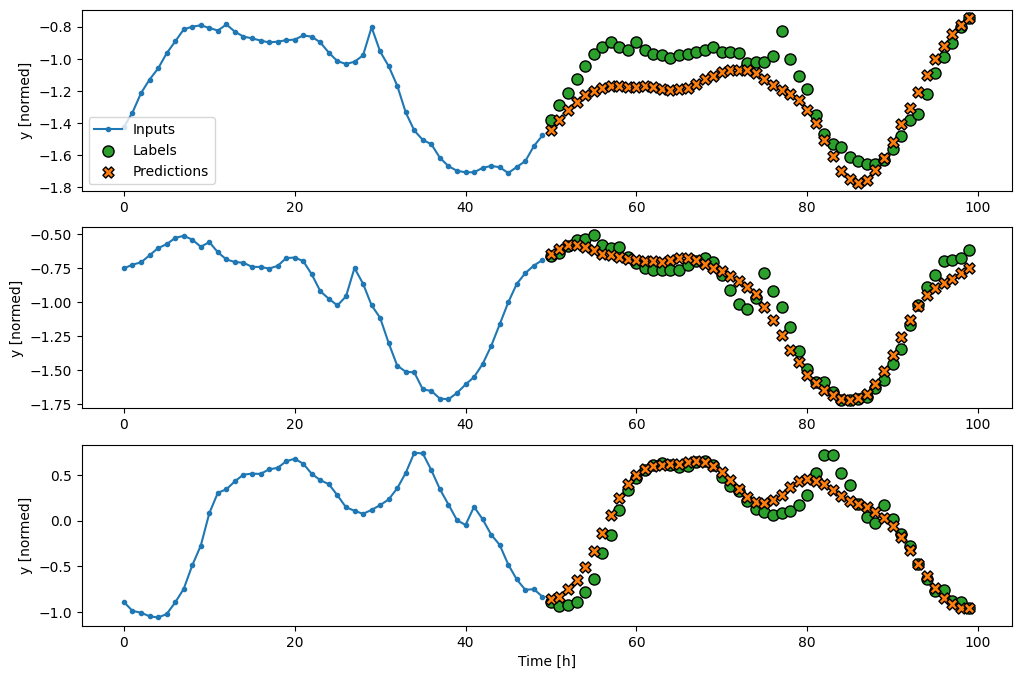

In [122]:
multi_RNN_window.plot(multi_lstm_model)

In [123]:
inputs, labels = multi_RNN_window.example
single_predictions = single_lstm_model(inputs)
multi_predictions = multi_lstm_model(inputs)

In [124]:
plot_col_index = multi_RNN_window.column_indices["y"]
if multi_RNN_window.label_columns:
    label_col_index = multi_RNN_window.label_columns_indices.get("y", None)
else:
    label_col_index = plot_col_index

Plotting Histogram

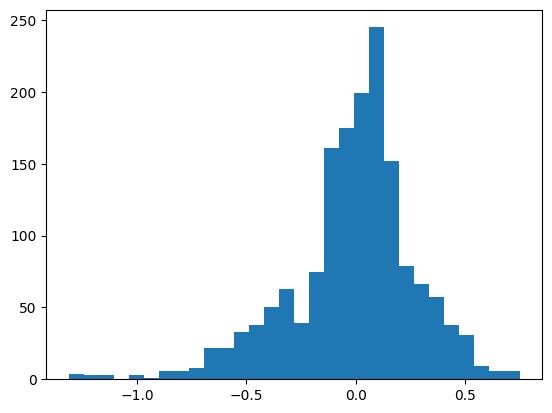

In [125]:
multi_RNN_window.plot_error_hist(single_lstm_model)

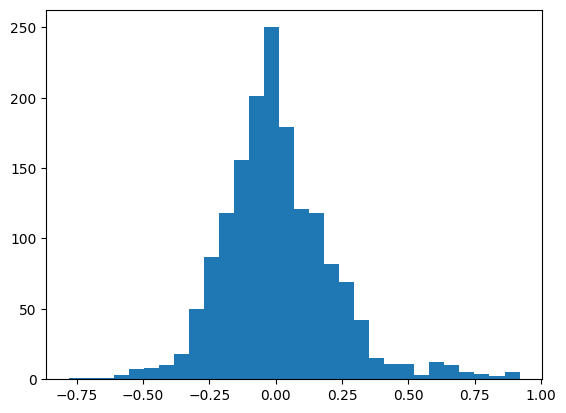

In [126]:
multi_RNN_window.plot_error_hist(multi_lstm_model)

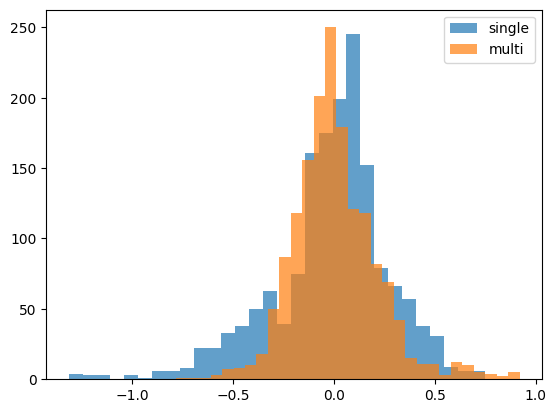

In [127]:
multi_RNN_window.compare_error_hist(models = [single_lstm_model,multi_lstm_model],label = ['single','multi'])